In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [154]:
# 1. Membaca dataset
print("1. Membaca Dataset")
df = pd.read_csv("Bank Customer Churn Prediction Cleaned.csv")
df = df.drop(['gender', 'country'], axis=1)
df.head(5)

1. Membaca Dataset


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15647311,608,41,1,83807.86,1,0,1,112542.58,0
1,15701354,699,39,1,0.00,2,0,0,93826.63,0
2,15737888,850,43,2,125510.82,1,1,1,79084.10,0
3,15592531,822,50,7,0.00,2,1,1,10062.80,0
4,15792365,501,44,4,142051.07,2,0,1,74940.50,0


In [155]:
print("Ukuran dataset awal:", df.shape)
print("\nInfo dataset:")
print(df.info())

Ukuran dataset awal: (7677, 10)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7677 entries, 0 to 7676
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7677 non-null   int64  
 1   credit_score      7677 non-null   int64  
 2   age               7677 non-null   int64  
 3   tenure            7677 non-null   int64  
 4   balance           7677 non-null   float64
 5   products_number   7677 non-null   int64  
 6   credit_card       7677 non-null   int64  
 7   active_member     7677 non-null   int64  
 8   estimated_salary  7677 non-null   float64
 9   churn             7677 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 599.9 KB
None


In [156]:
# 2. Mendeteksi dan menangani data duplikat
print("\n2. Pengecekan Data Duplikat")
duplicates = df.duplicated().sum()
print("Jumlah data duplikat:", duplicates)
if duplicates > 0:
    df = df.drop_duplicates()
    print("Data duplikat telah dihapus")
print("Ukuran dataset setelah menghapus duplikat:", df.shape)


2. Pengecekan Data Duplikat
Jumlah data duplikat: 0
Ukuran dataset setelah menghapus duplikat: (7677, 10)


In [157]:
# 3. Mendeteksi dan menangani missing values
print("\n3. Pengecekan Missing Values")
missing_values = df.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)
if missing_values.sum() > 0:
    df = df.dropna()
    print("Missing values telah dihapus")
print("Ukuran dataset setelah menghapus missing values:", df.shape)


3. Pengecekan Missing Values
Jumlah missing values per kolom:
customer_id         0
credit_score        0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64
Ukuran dataset setelah menghapus missing values: (7677, 10)



4. Penanganan Outliers
Box plots sebelum penanganan outliers:


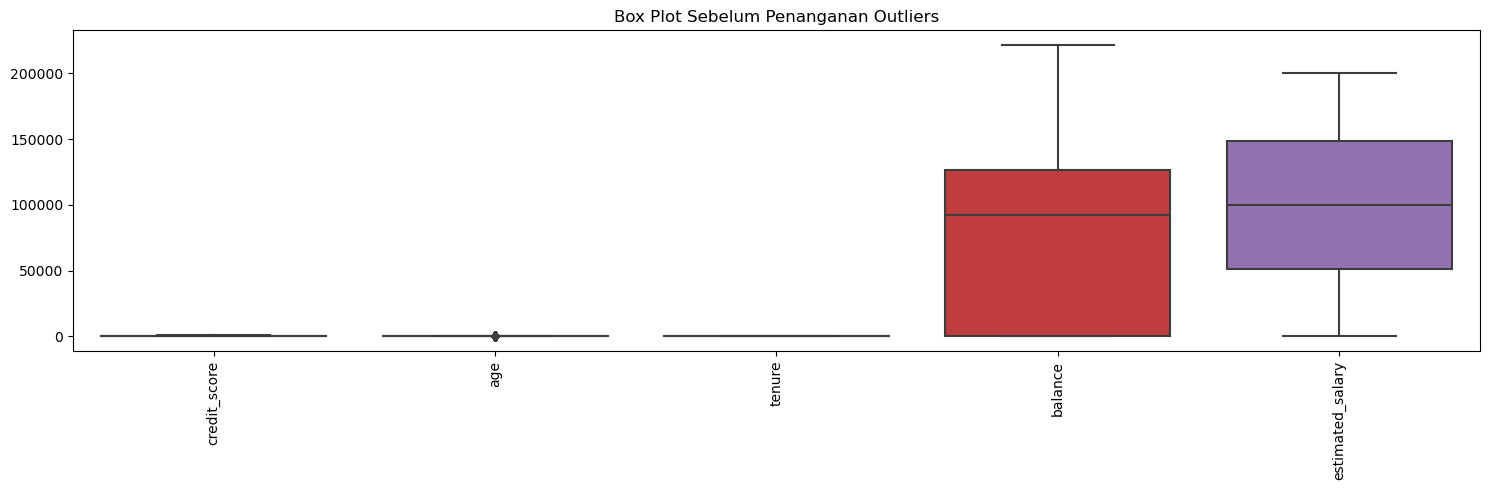

In [158]:
# 4. Mendeteksi dan menangani outliers menggunakan IQR method
print("\n4. Penanganan Outliers")
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

plt.figure(figsize=(15, 5))
print("Box plots sebelum penanganan outliers:")
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Box Plot Sebelum Penanganan Outliers")
plt.tight_layout()
plt.show()


Ukuran dataset setelah menghapus outliers: (7477, 10)
Box plots setelah penanganan outliers:


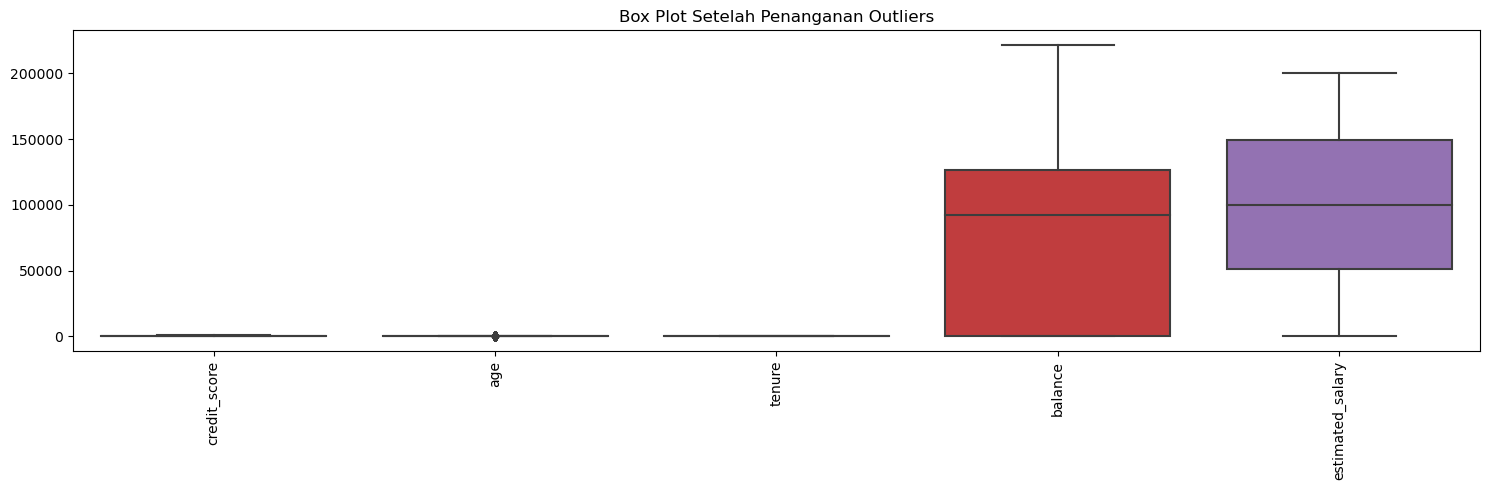

In [159]:
# Fungsi untuk mendeteksi outliers
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df_no_outliers = remove_outliers(df, numerical_cols)
print("\nUkuran dataset setelah menghapus outliers:", df_no_outliers.shape)

plt.figure(figsize=(15, 5))
print("Box plots setelah penanganan outliers:")
sns.boxplot(data=df_no_outliers[numerical_cols])
plt.xticks(rotation=90)
plt.title("Box Plot Setelah Penanganan Outliers")
plt.tight_layout()
plt.show()

In [160]:
# 5. Encoding kolom kategorikal
# print("\n5. Encoding Data Kategorikal")
# le = LabelEncoder()
# df_no_outliers['gender'] = le.fit_transform(df_no_outliers['gender'])
# df_no_outliers = pd.get_dummies(df_no_outliers, columns=['country'])

In [161]:
# 6. Standardisasi fitur numerik
# print("\n6. Standardisasi Fitur Numerik")
# scaler = StandardScaler()
# df_no_outliers[numerical_cols] = scaler.fit_transform(df_no_outliers[numerical_cols])

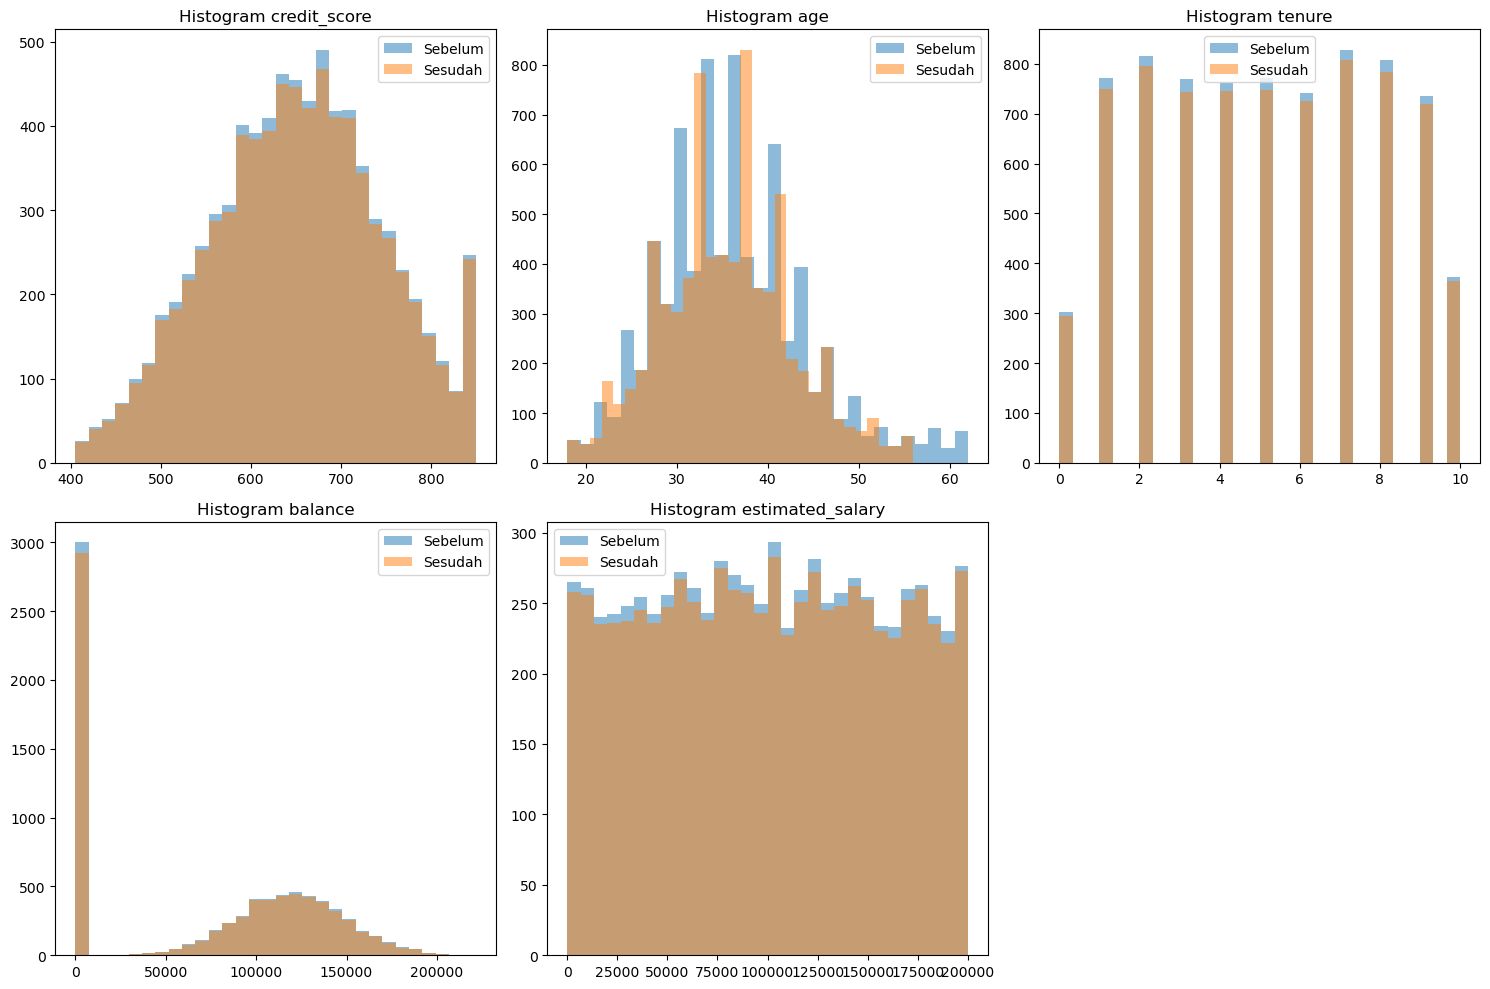

In [162]:
# 7. Visualisasi histogram sebelum dan sesudah preprocessing
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=30, alpha=0.5, label='Sebelum')
    plt.hist(df_no_outliers[col], bins=30, alpha=0.5, label='Sesudah')
    plt.title(f'Histogram {col}')
    plt.legend()
plt.tight_layout()
plt.show()

In [163]:
# 8. Menyimpan dataset yang telah dipreprocessing
print("\n7. Menyimpan Dataset Hasil Preprocessing")
df_no_outliers.to_csv("Bank Customer Churn Prediction Pre-Processed.csv", index=False)
print("Dataset telah disimpan sebagai 'Bank Customer Churn Prediction Pre-Processed.csv'")


7. Menyimpan Dataset Hasil Preprocessing
Dataset telah disimpan sebagai 'Bank Customer Churn Prediction Pre-Processed.csv'


In [164]:
# 9. Membaca kembali dataset yang telah dipreprocessing
print("\n8. Membaca Dataset Hasil Preprocessing")
df_processed = pd.read_csv("Bank Customer Churn Prediction Pre-Processed.csv")
print("Ukuran dataset setelah preprocessing:", df_processed.shape)


8. Membaca Dataset Hasil Preprocessing
Ukuran dataset setelah preprocessing: (7477, 10)


In [165]:
df = df_processed.drop(['customer_id'], axis=1)
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,608,41,1,83807.86,1,0,1,112542.58,0
1,699,39,1,0.00,2,0,0,93826.63,0
2,850,43,2,125510.82,1,1,1,79084.10,0
3,822,50,7,0.00,2,1,1,10062.80,0
4,501,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...
7472,644,28,7,155060.41,1,1,0,29179.52,0
7473,800,29,2,0.00,2,0,0,167773.55,0
7474,771,39,5,0.00,2,1,0,96270.64,0
7475,516,35,10,57369.61,1,1,1,101699.77,0


In [166]:
# 3. Memisahkan fitur (X) dan target (y)
#    Fitur yang digunakan adalah semua kolom kecuali 'churn' yang merupakan target.
X = df.drop(['churn'], axis=1)
y = df['churn']

# 4. Tahap Data Splitting:
#    Memisahkan data menjadi training set dan test set dengan perbandingan misal 90% data latih dan 10% data uji.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 5. Inisialisasi model klasifikasi
#    b. Decision Tree
dtree = DecisionTreeClassifier(random_state=42)

#    c. Random Forest
rf = RandomForestClassifier(random_state=42)

#    d. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()

# 6. Melatih (fit) model-model tersebut menggunakan data latih
dtree.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Opsional: Cetak pesan untuk menandakan bahwa pelatihan sudah selesai.
print("Semua model telah dilatih dengan data latih.")

Semua model telah dilatih dengan data latih.


In [167]:
# Standardize features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    if name == "KNN":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # Macro for multi-class
    
    print(f"{name} Model:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}\n")


KNN Model:
  Accuracy: 1.0000
  Precision: 1.0000

Decision Tree Model:
  Accuracy: 1.0000
  Precision: 1.0000

Random Forest Model:
  Accuracy: 1.0000
  Precision: 1.0000



# Memprediksi nilai output (churn) untuk data input baru.
# Misal: kita memiliki data input baru sebagai berikut:
# credit_score: 600,   age: 40, tenure: 3,
# balance: 60000, products_number: 2, credit_card: 1, active_member: 1, estimated_salary: 50000

In [168]:
# Buat data input baru dalam bentuk dictionary
new_input = {
    'credit_score': 0,
    'age': 40,
    'tenure': 3,
    'balance': 0,
    'products_number': 2,
    'credit_card': 1,
    'active_member': 1,
    'estimated_salary': 0,
}

# Ubah data input menjadi DataFrame
new_df = pd.DataFrame([new_input])

# Pastikan struktur kolom pada data baru sama dengan fitur yang digunakan saat pelatihan
# Jika ada kolom yang hilang, isi dengan nilai 0
new_df = new_df.reindex(columns=X_train.columns, fill_value=0)

# 8. Menggunakan model-model untuk memprediksi churn
pred_dtree  = dtree.predict(new_df)
pred_rf     = rf.predict(new_df)
pred_knn    = knn.predict(new_df)


In [169]:
# 9. Menampilkan hasil prediksi
print("Prediksi churn untuk data input baru:")
print(" - Decision Tree            :", pred_dtree[0])
print(" - Random Forest            :", pred_rf[0])
print(" - K-Nearest Neighbors (KNN):", pred_knn[0])

Prediksi churn untuk data input baru:
 - Decision Tree            : 0
 - Random Forest            : 0
 - K-Nearest Neighbors (KNN): 0
